In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [5]:
df=pd.read_csv('spam.csv', encoding='latin1')

In [8]:
df = df[['v1', 'v2']]


In [9]:
df.columns = ['label', 'message']


In [10]:
df['label'].value_counts()


,count
label,
ham,4825
spam,747


In [11]:
df['label'] = df['label'].map({'ham':0, 'spam':1})


/tmp/ipython-input-1203025263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].map({'ham':0, 'spam':1})


In [12]:
df['message'] = df['message'].str.lower()


/tmp/ipython-input-1576429111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message'] = df['message'].str.lower()


In [13]:
df['message'] = df['message'].str.replace('[^a-zA-Z ]', '', regex=True)


/tmp/ipython-input-3531331508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message'] = df['message'].str.replace('[^a-zA-Z ]', '', regex=True)


In [14]:
df['message'] = df['message'].apply(lambda x: x.strip())


/tmp/ipython-input-610635914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message'] = df['message'].apply(lambda x: x.strip())


In [15]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['message'])


In [16]:
y = df['label']


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [18]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [19]:
y_pred = model.predict(X_test)


In [20]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9704035874439462


In [21]:
np.zeros(5)


array([0., 0., 0., 0., 0.])

In [22]:
np.sum(df['label'])


np.int64(747)

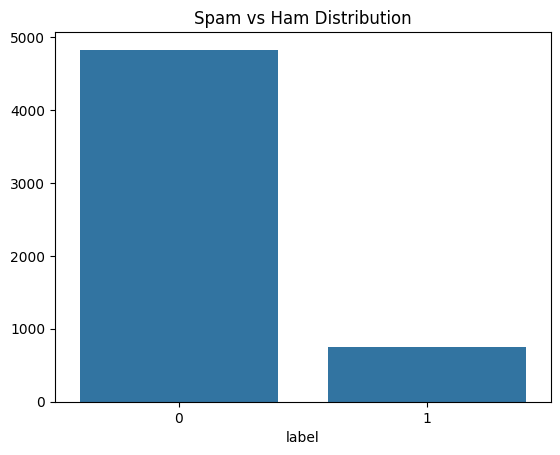

In [23]:
sns.barplot(x=df['label'].value_counts().index,
            y=df['label'].value_counts().values)
plt.title("Spam vs Ham Distribution")
plt.show()


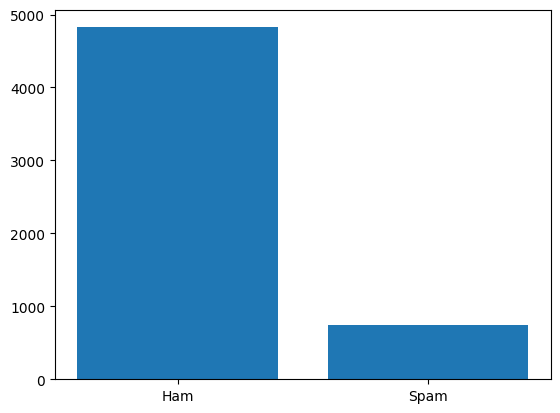

In [24]:
plt.bar(['Ham','Spam'], df['label'].value_counts())
plt.show()
